<a href="https://colab.research.google.com/github/Dhanyamanogaran/assignment_1/blob/main/ISI_assignment_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as z
from sklearn.preprocessing import MinMaxScaler as minmax

In [ ]:
#read the excel file
df=pd.read_excel('/content/Heart_Disease_Data.xlsx')

In [ ]:
#explore the data to find missing values 
df.isnull().sum()

Age            0
Sex            0
CP             0
RestBP         0
Cholesteral    0
FBP            0
RestECG        0
Max_HR         0
ExAngina       0
Oldpeak        0
Slope          0
CA             0
Thal           0
Result         0
dtype: int64

In [ ]:
#summary of the data
df.describe()

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#filtering the categorical features
categorical=[]
def filter_cat(cat):
  for i in cat:
    if df[i].any()<20:
      categorical.append(i)

In [ ]:
filter_cat(df.columns)
categorical

['Age',
 'Sex',
 'CP',
 'RestBP',
 'Cholesteral',
 'FBP',
 'RestECG',
 'Max_HR',
 'ExAngina',
 'Oldpeak',
 'Slope',
 'CA',
 'Thal',
 'Result']

In [ ]:
#listing out the numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:',len(numerical_features))

Number of numerical variables: 14


In [ ]:
#finding the categorical_features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

Exploratory data analysis

Text(0.5, 1.0, 'patients having heart disease or not')

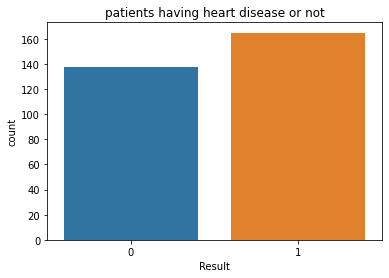

In [ ]:
#checking if the data is balanced or not
sns.countplot(x="Result",data=df)
plt.title("patients having heart disease or not")

#interpretation :from the count plot, the graph looks like the dataset is balanced

Text(0.5, 1.0, 'Heart disease among patients of different sex')

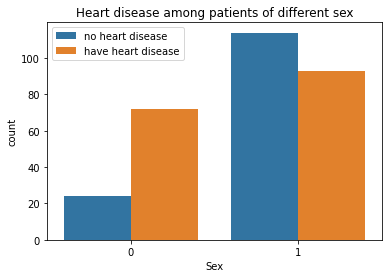

In [ ]:
sns.countplot(x="Sex",data=df,hue="Result")
plt.legend(["no heart disease","have heart disease"])
plt.title("Heart disease among patients of different sex")
#1 indicates male
#0 indicates female

Text(0, 0.5, 'Max heart rate')

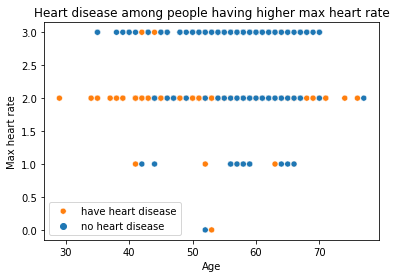

In [ ]:
#check relation between age and max heart rate
sns.scatterplot(x='Age',y='Thal',data=df,hue='Result')
plt.legend(["have heart disease","no heart disease"])
plt.title("Heart disease among people having higher max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
 

Text(0.5, 6.79999999999999, 'Cholesteral')

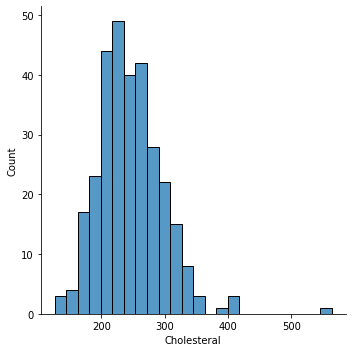

In [ ]:
#checking distribution of cholestrol
sns.displot(df["Cholesteral"])
plt.xlabel("Cholesteral")

In [ ]:
#interpretation : distribution looks normal but it is bit positively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


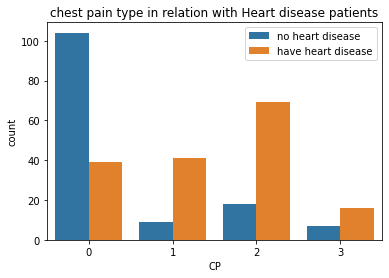

In [ ]:
#relation between chest pain type and heart disease
sns.countplot(df.CP,hue=df.Result)
plt.legend(["no heart disease","have heart disease"])
plt.title("chest pain type in relation with Heart disease patients")
xlabel=("chest pain type")

Text(0.5, 6.79999999999999, 'Resting blood pressure')

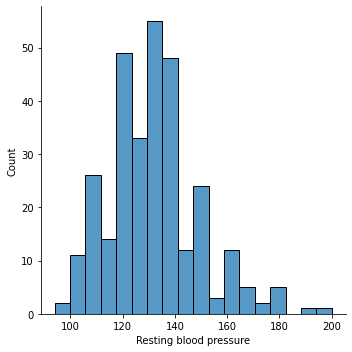

In [ ]:
sns.displot(df["RestBP"])
plt.xlabel("Resting blood pressure")

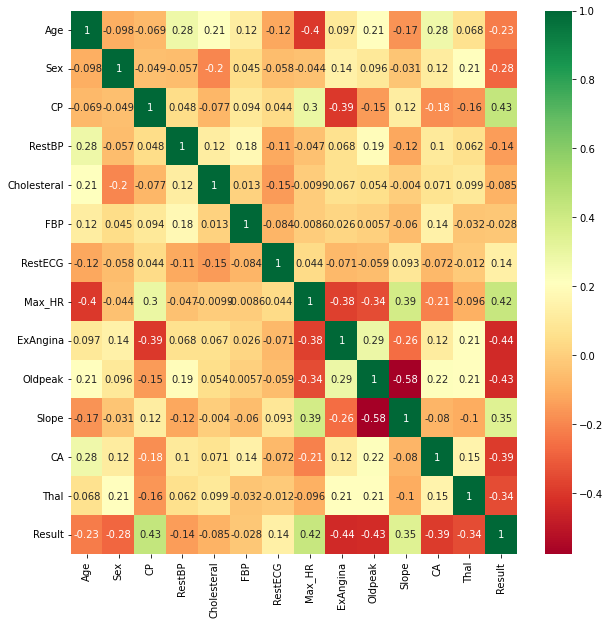

In [ ]:
corr_mat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True, cmap='RdYlGn')

In [ ]:
corr_mat

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
CP,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
RestBP,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesteral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
FBP,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
RestECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Max_HR,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
ExAngina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
#features having high correlation with the Result variable
corr_features=[]
mat=corr_mat.iloc[:-1]['Result']
for index, i in enumerate(mat):
  if i >= 0.4 or i <= -0.4:
    corr_features.append(mat.index[index])
corr_features 

['CP', 'Max_HR', 'ExAngina', 'Oldpeak']

<Figure size 360x360 with 0 Axes>

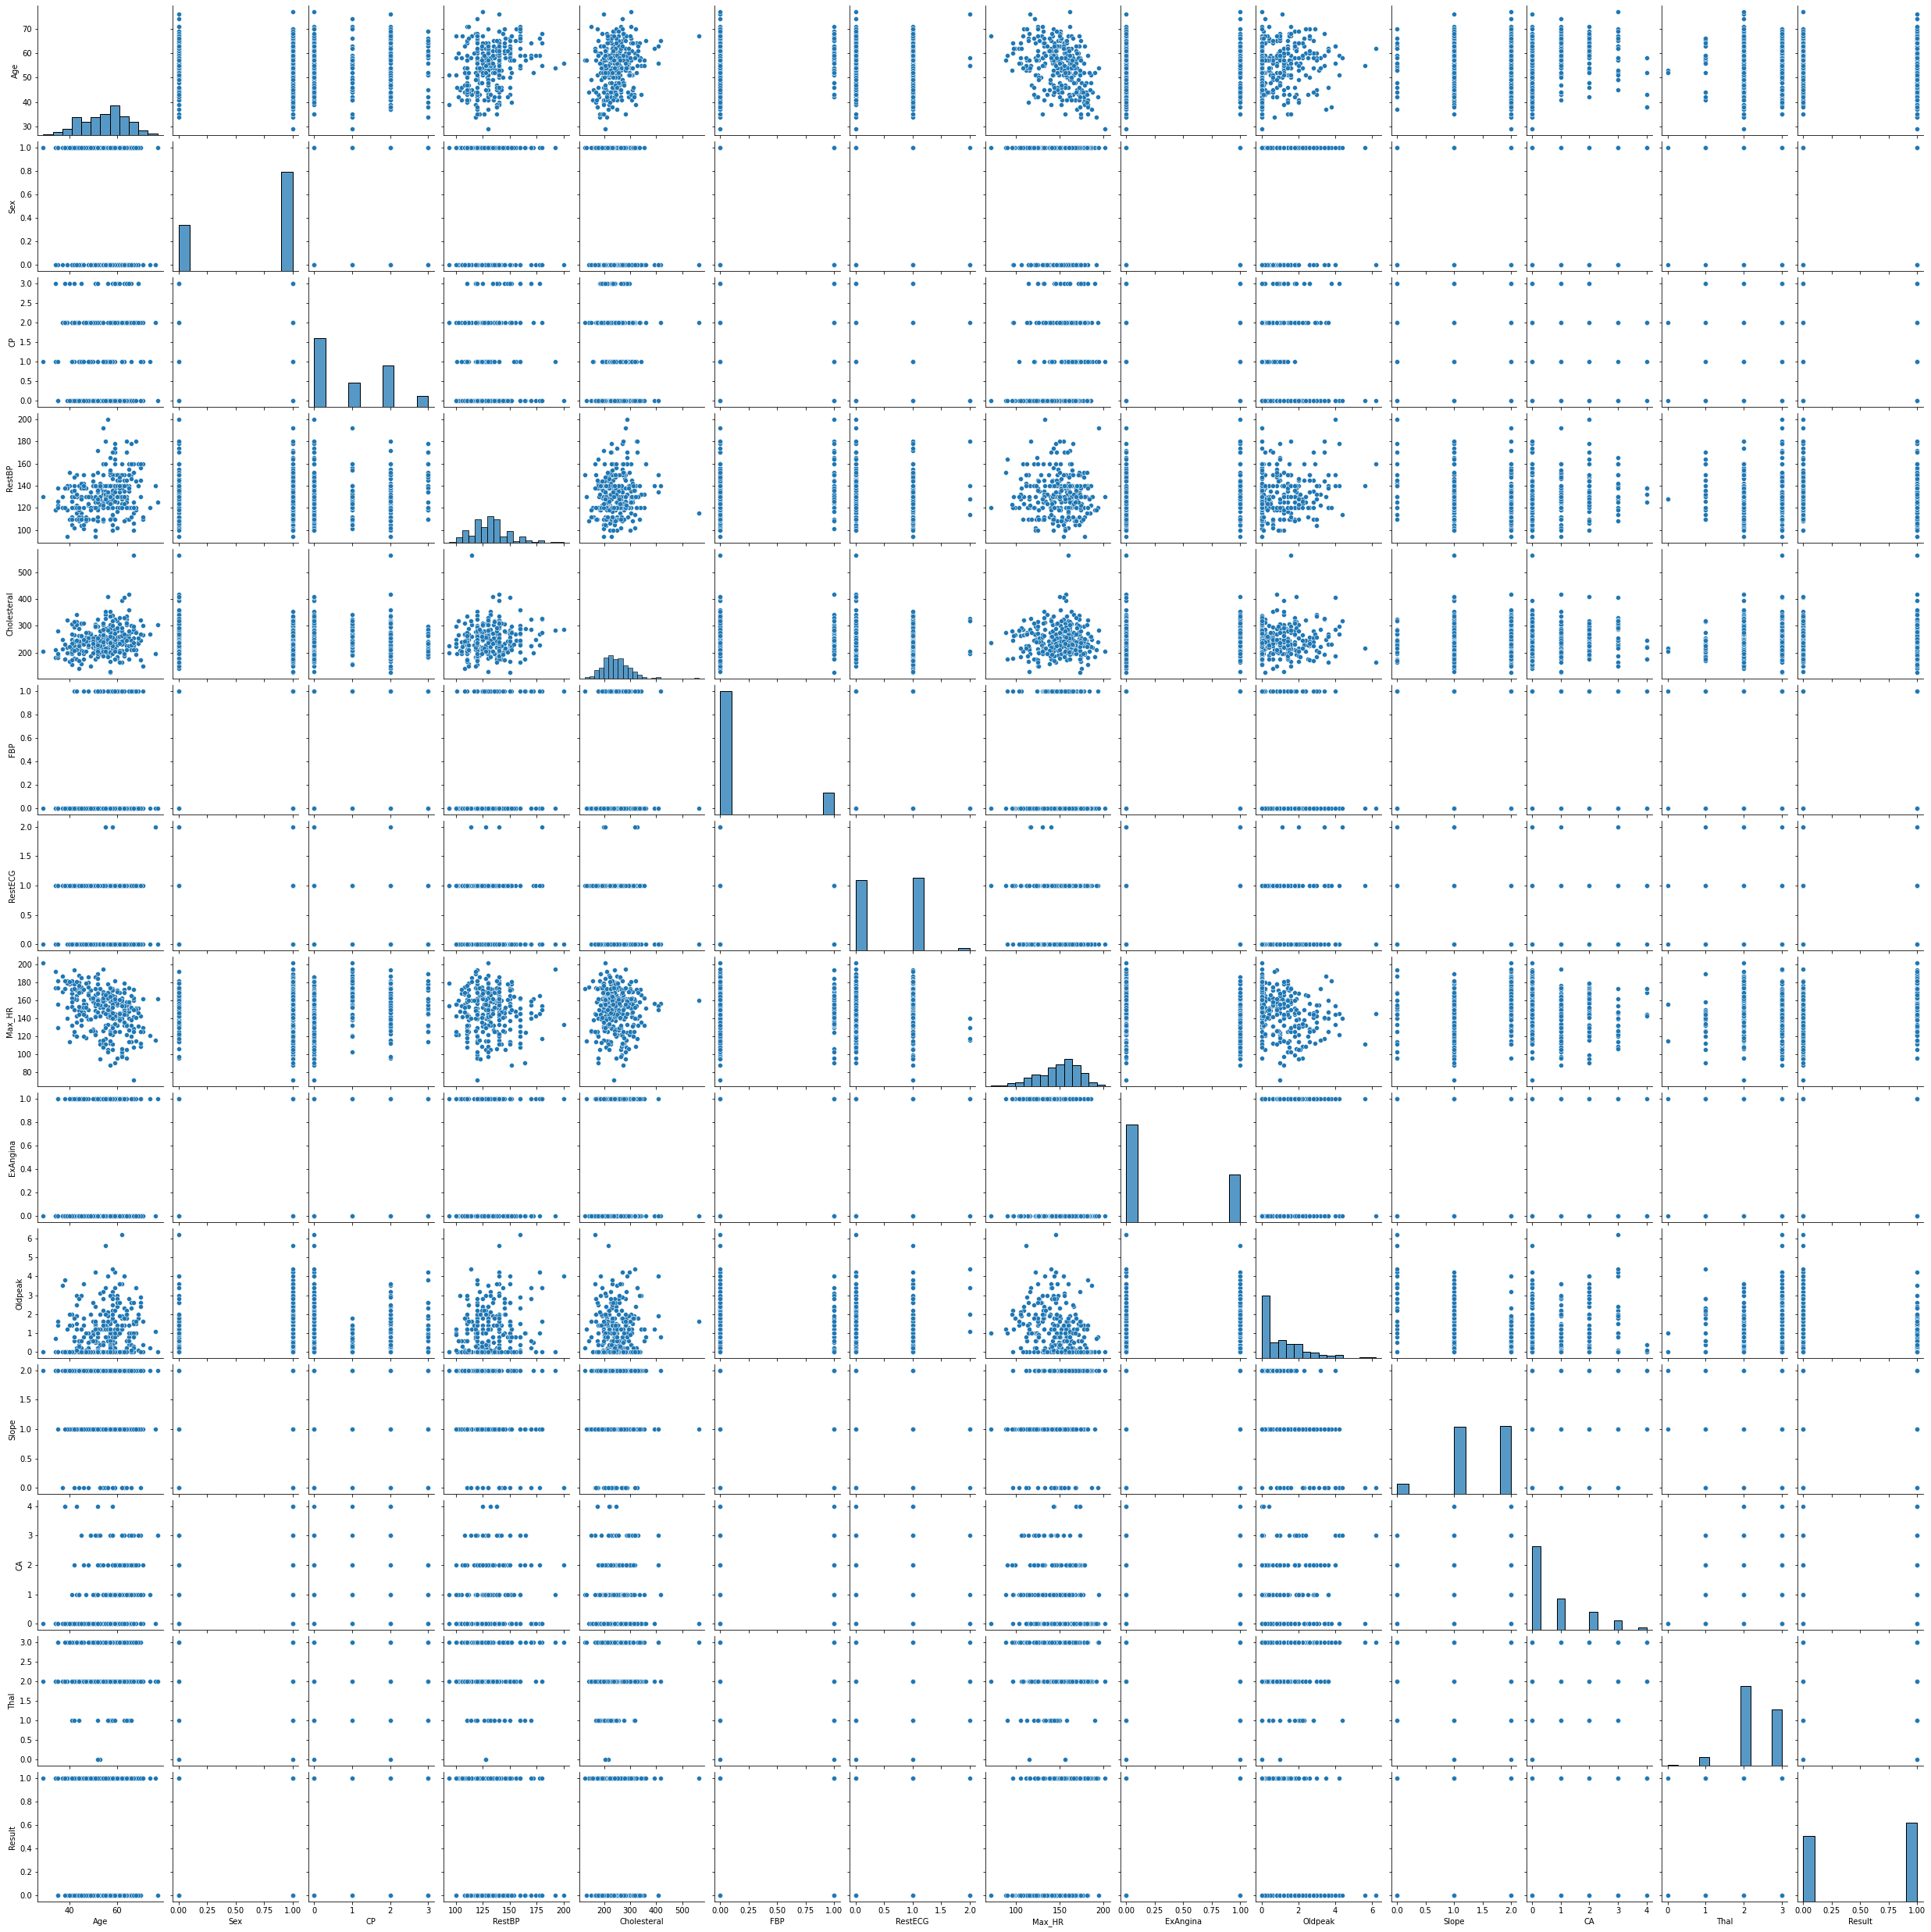

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.show()

In [ ]:
#separating the features and the target
features=df.drop('Result',axis=1)
target=df['Result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train, y_test= train_test_split(features,target)

In [ ]:
x_train.shape

(227, 13)

In [ ]:
x_test.shape

(76, 13)

In [ ]:
y_test.shape

(76,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Y_pred_lr=lr.predict(x_test)

In [ ]:
score_lr= round(accuracy_score(Y_pred_lr,y_test)*100,2)
score_lr

88.16

In [ ]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred_lr)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred_lr)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5263157894736843
Mean Absolute Error :  0.11842105263157894


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
y=df.Result

In [ ]:
x=df.iloc[:,0:13]
x.head(2)

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [ ]:
model=sm.Logit(y,x)
myresult= model.fit()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7


In [ ]:
myresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Mon, 31 Jan 2022   Pseudo R-squ.:                  0.4893
Time:                        06:54:49   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0128      0.019      0.670      0.503      -0.025       0.050
Sex            -1.6381      0.452     -3.625      0.000      -2.524      -0.752
CP              0.8490      0.184      4.613      0.000       0.488       1.210
RestBP         -0.0153      0.010     -1.562      0.118      -0.035       0.004
Cholesteral    -0.0036      0.004     -0.960      0.337      -0.011       0.004
FBP            -0.0115      0.526     -0.022      0.983      -1.042       1.019
RestECG         0.5432      0.342      1.589      0.112      -0.127       1.213
Max_HR          0.0319      0.008      3.779      0.000       0.015       0.048
ExAngina       -0.8920      0.403     -2.215      0.027      -1.681      -0.103
Oldpeak        -0.4988      0.209     -2.381      0.017      -0.909      -0.088
Slope           0.6092      0.346      1.761      0.078      -0.069       1.287
CA             -0.7725      0.189     -4.080      0.000      -1.144      -0.401
Thal           -0.8438      0.287     -2.937      0.003      -1.407      -0.281
===============================================================================
"""

In [ ]:
PRED=myresult.predict(x)
predclass=[1 if i >= 0.5 else 0 for i in PRED]
MYOUTPUT=pd.DataFrame(predclass)

In [ ]:
df.Result.head(2)

0    1
1    1
Name: Result, dtype: int64

In [ ]:
Y_pred_lr

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

cpu dataset

In [ ]:
cp=pd.read_excel("/content/CPU_Data.xlsx")

In [ ]:
cp.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


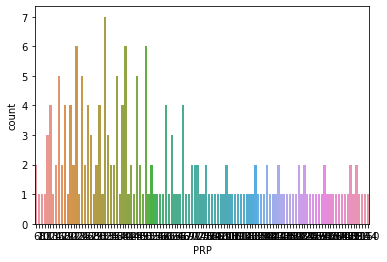

In [ ]:
#checking if the data is balanced or not
sns.countplot(x="PRP",data=cp)
plt.show()

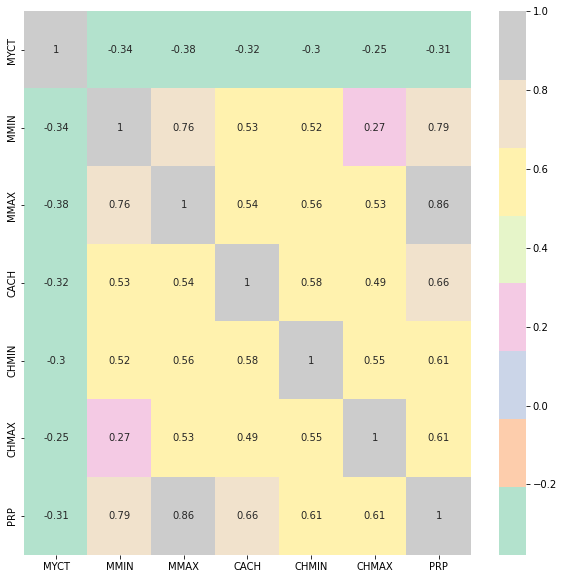

In [ ]:
corr_mat_=cp.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_,annot=True, cmap='Pastel2')

<Figure size 360x360 with 0 Axes>

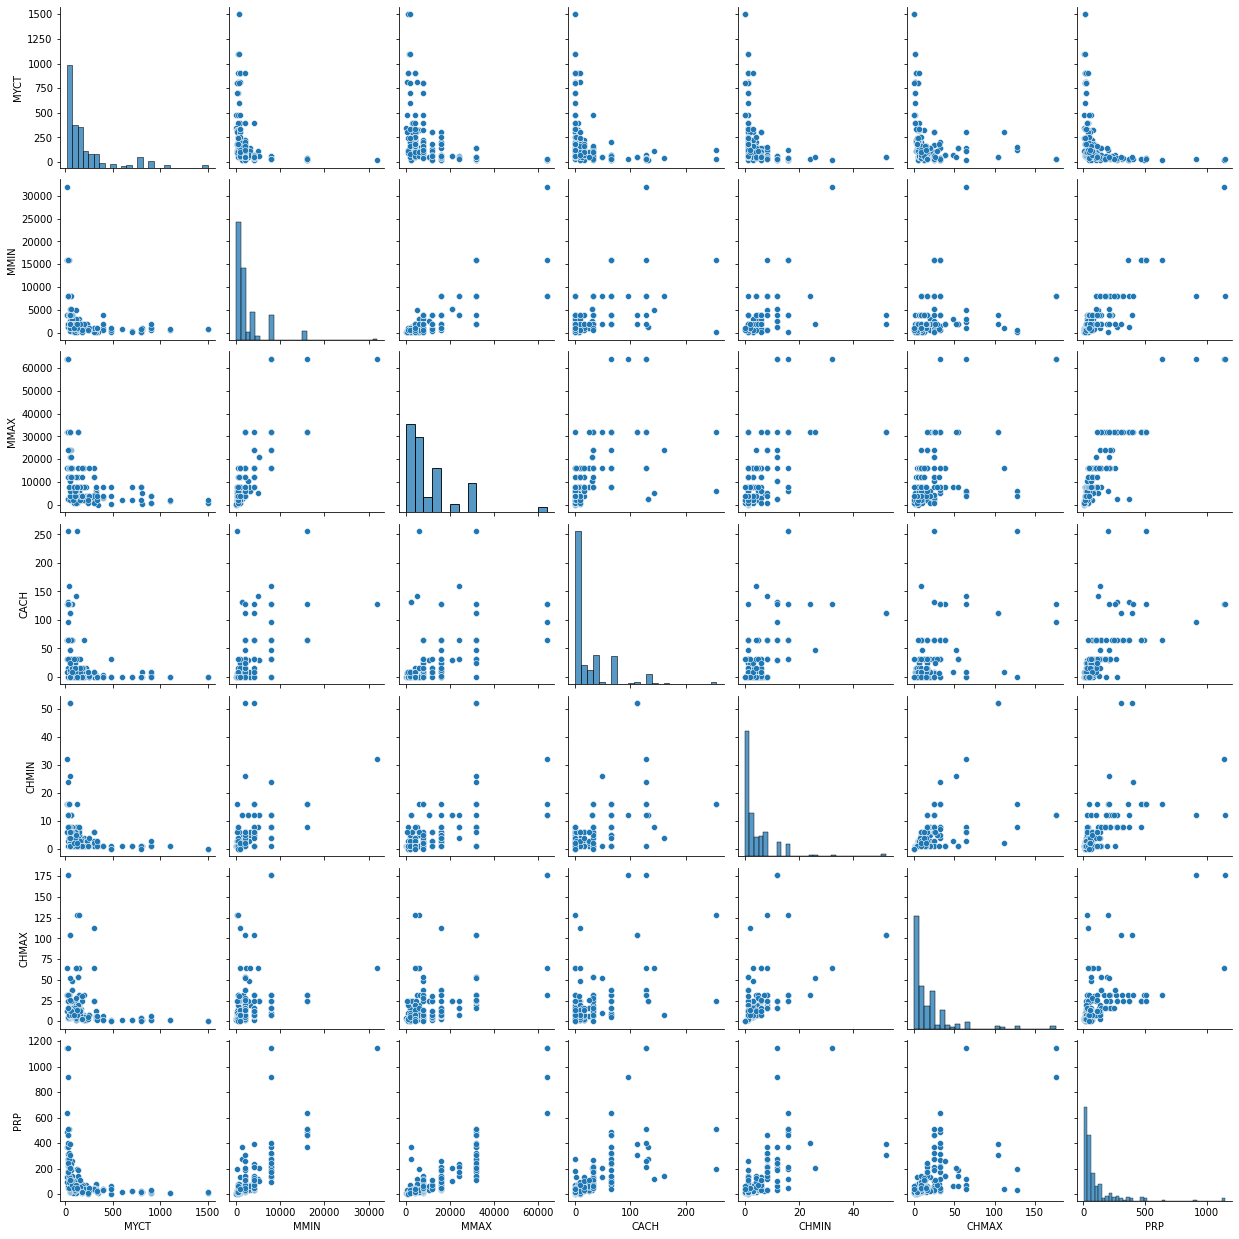

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(cp)
plt.show()

In [ ]:
a=cp.iloc[:,0:5]
a.head(2)

,MYCT,MMIN,MMAX,CACH,CHMIN
0,125,256,6000,256,16
1,29,8000,32000,32,8


In [ ]:
b=cp.PRP


In [ ]:
a_train, a_test,b_train, b_test= train_test_split(a,b)

In [ ]:
LR=LogisticRegression()
LR.fit(a_train,b_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
b_pred=LR.predict(a_test)
b_pred

array([  32,  214,  510,  636,   22, 1150,  510,   50,  307,   22,  134,
         22,   38,   32,   38,  134,   32,   38,  510,  636,  510,   38,
         32,  636,   32,   50,   12,   22,   20, 1150, 1150,  636,  510,
        134,   32,   20,   22,   32,  636,  510,   32,  636,  636,   22,
        214,   32,   32,   22,  510, 1150,   32,   32,   38])

In [ ]:
score_LR= accuracy_score(b_pred,b_test)
score_LR

0.0

In [ ]:

# R squared error
score_1_ = metrics.r2_score(b_test, b_pred)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(b_test, b_pred)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  -9.509072579473713
Mean Absolute Error :  190.0566037735849


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
stand= StandardScaler()
a_train = stand.fit_transform(a_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(a_train, b_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_prediction=knn.predict(a_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#checking accuracy
accuracy_score(b_test, Y_prediction)*100

0.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(b_test, Y_prediction)

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn import linear_model
reg= linear_model.LinearRegression()
reg.fit(a_train,b_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 14.32098401,  39.11799265, 103.96401865,  38.5208337 ,
         2.0420647 ])